In [46]:
%matplotlib inline
import os
os.chdir("/home/zhuangboer/isilon-home/cifar100/")#your work dir
from tqdm import tqdm_notebook as tqdm

In [47]:
import numpy
import torch
import torchvision

In [48]:
from dataset import get_trainloader,get_testloader
from torchvision import transforms
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])

trainloader = get_trainloader(batch_size = 64)

In [49]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

# show some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

torch.Size([32, 32])


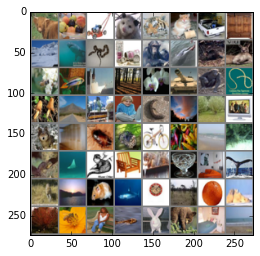

In [50]:
print(images[1][1].size())
# print images
imshow(torchvision.utils.make_grid(images))

In [51]:
from model.test import Net
net = Net().cuda()

In [52]:
import torch.optim as optim
from torch import nn
criterion = nn.CrossEntropyLoss() # use a Classification Cross-Entropy loss
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [53]:
from torch.autograd import Variable
for epoch in range(20): # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in tqdm(enumerate(trainloader, 0)):
        # get the inputs
        inputs, labels = data
        
        # wrap them in Variable
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()        
        optimizer.step()
        
        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')


Finished Training


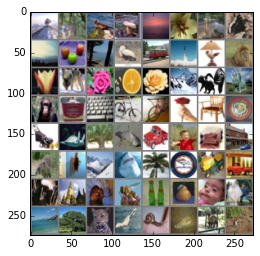

In [54]:
testloader = get_testloader(batch_size = 64)
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
#print('GroundTruth: ', ' '.join('%5s'%classes[labels[j]] for j in range(4)))

In [13]:
outputs = net(Variable(images))

# the outputs are energies for the 10 classes. 
# Higher the energy for a class, the more the network 
# thinks that the image is of the particular class

# So, let's get the index of the highest energy
_, predicted = torch.max(outputs.data, 1)

#print('Predicted: ', ' '.join('%5s'% classes[predicted[j][0]] for j in range(4)))


RuntimeError: expected CPU tensor (got CUDA tensor)

In [55]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    images = Variable(images).cuda()
    labels = labels.cuda()
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

    
print(correct,total)

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


2809 10000
Accuracy of the network on the 10000 test images: 28 %


In [56]:
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))
for data in testloader:
    images, labels = data
    images = Variable(images).cuda()
    labels = labels.cuda()
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(min(64,list(c.size())[0])):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1
for i in range(100):
    if class_total[i]==0: continue
    print('Accuracy of %5s : %2d %%' % (i, 100 * class_correct[i] / class_total[i]))


Accuracy of     0 : 48 %
Accuracy of     1 : 35 %
Accuracy of     2 : 22 %
Accuracy of     3 : 19 %
Accuracy of     4 : 16 %
Accuracy of     5 : 23 %
Accuracy of     6 : 23 %
Accuracy of     7 : 25 %
Accuracy of     8 : 30 %
Accuracy of     9 : 37 %
Accuracy of    10 :  3 %
Accuracy of    11 :  7 %
Accuracy of    12 : 27 %
Accuracy of    13 : 21 %
Accuracy of    14 : 13 %
Accuracy of    15 : 13 %
Accuracy of    16 : 19 %
Accuracy of    17 : 52 %
Accuracy of    18 : 32 %
Accuracy of    19 : 24 %
Accuracy of    20 : 63 %
Accuracy of    21 : 47 %
Accuracy of    22 : 16 %
Accuracy of    23 : 44 %
Accuracy of    24 : 47 %
Accuracy of    25 : 21 %
Accuracy of    26 : 28 %
Accuracy of    27 : 27 %
Accuracy of    28 : 51 %
Accuracy of    29 : 30 %
Accuracy of    30 : 37 %
Accuracy of    31 : 29 %
Accuracy of    32 : 12 %
Accuracy of    33 : 46 %
Accuracy of    34 : 37 %
Accuracy of    35 :  8 %
Accuracy of    36 : 24 %
Accuracy of    37 : 25 %
Accuracy of    38 : 25 %
Accuracy of    39 : 17 %
